# **Supervised Learning - Autism Dataset for Toddlers**

## Autism Spectrum Disorder (ASD) Diagnosis

# **Introduction**

# The Dataset being used is adapted from the Kaggle's Autism Dataset for Toddlers page, which contains 1054 reported cases , each with 19 attributes. The most important ones to look at is, namely, the Q-chat-score, that is , the aggregate of the results from the 10-question questionaire, that corresponds to influential features to be utilised for further analysis especially in determining autistic traits , each one corresponding also to an binary attribute, and other labeled attributes, such as Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test, and the "Class/ASD Traits ", which is derived from the Q-Chat Score. The remaining one that is numeric , is the case numeber, a unique identifier for each row of results

# The goal of this project is to improve the classification of the ASD traits, given a whole dataset of diagnosis based on certain features evaluated on the questionnaires, and evaluate their distribution by other parallel factors that are labeled, such as Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test, and the "Class/ASD Traits "

# The solution to this problem is a supervised learning model, which will be trained using the dataset mentioned above. The model will be trained using the training set, and then evaluated using the test set. The model will be evaluated using the accuracy metric, which is the percentage of diagnosis that are correctly done / probability of a certain diagnose is correctly done , taking into account all the labeled factors.

---

This project was made possible by:

| Name | Email |
|-|-|
| André Silva | up202108724@up.pt |
| Bernardo Pinto | up202108842@up.pt |
| Francisco Sousa | up202108838@up.pt |
|---|---|
| Group | T10 - G104 |

### Importing libraries

Throughout the study, many libraries were incrementally added, thus, it is important to install them all, which can be done by running the following command in the terminal (make sure you are in the project's root directory):

```bash
pip install -r requirements.txt
```

Then, we can import the libraries we will use in this project.

Note that we also had disabled the warnings, to make the notebook cleaner.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier # não está a funcionar, por agora
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
#import pycaret


In [2]:
#import pandas as pd

dataframe = pd.read_csv("./Autism_dataset.csv")
dataframe.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


# Data pre-processing



In [3]:
dataframe.describe()


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [4]:
dataframe.isna().any()

Case_No                   False
A1                        False
A2                        False
A3                        False
A4                        False
A5                        False
A6                        False
A7                        False
A8                        False
A9                        False
A10                       False
Age_Mons                  False
Qchat-10-Score            False
Sex                       False
Ethnicity                 False
Jaundice                  False
Family_mem_with_ASD       False
Who completed the test    False
Class/ASD Traits          False
dtype: bool

In [5]:
dataframe= dataframe.drop(columns=['Case_No','Qchat-10-Score'])
print(dataframe['Class/ASD Traits'].head())

0     No
1    Yes
2    Yes
3    Yes
4    Yes
Name: Class/ASD Traits, dtype: object


In [6]:

encoder= LabelEncoder()

binary_cols= ["Sex", "Jaundice", "Family_mem_with_ASD" , "Class/ASD Traits"]

for binary_atribute in binary_cols:
    dataframe[binary_atribute] = encoder.fit_transform(dataframe[binary_atribute])

dataframe["Who completed the test"]= dataframe["Who completed the test"].replace("Health care professional","Health Care Professional")

#print(dataframe["Who completed the test"].unique())

categorical_cols = ["Ethnicity", "Who completed the test"]


# Applying one-hot encoding to categorical columns
one_hot_encoded = pd.get_dummies(dataframe[categorical_cols])

# Concatenating one-hot encoded columns with the original dataframe
dataframe_encoded = pd.concat([dataframe, one_hot_encoded], axis=1)

# Dropping the original categorical columns
dataframe_encoded.drop(categorical_cols, axis=1, inplace=True)

# Displaying the resulting dataframe
#np.unique(dataframe_encoded.iloc[:,17:18])



# Dataset Analysis

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Class/ASD Traits',
       'Ethnicity_Hispanic', 'Ethnicity_Latino', 'Ethnicity_Native Indian',
       'Ethnicity_Others', 'Ethnicity_Pacifica', 'Ethnicity_White European',
       'Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian',
       'Who completed the test_Health Care Professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member'],
      dtype='object')


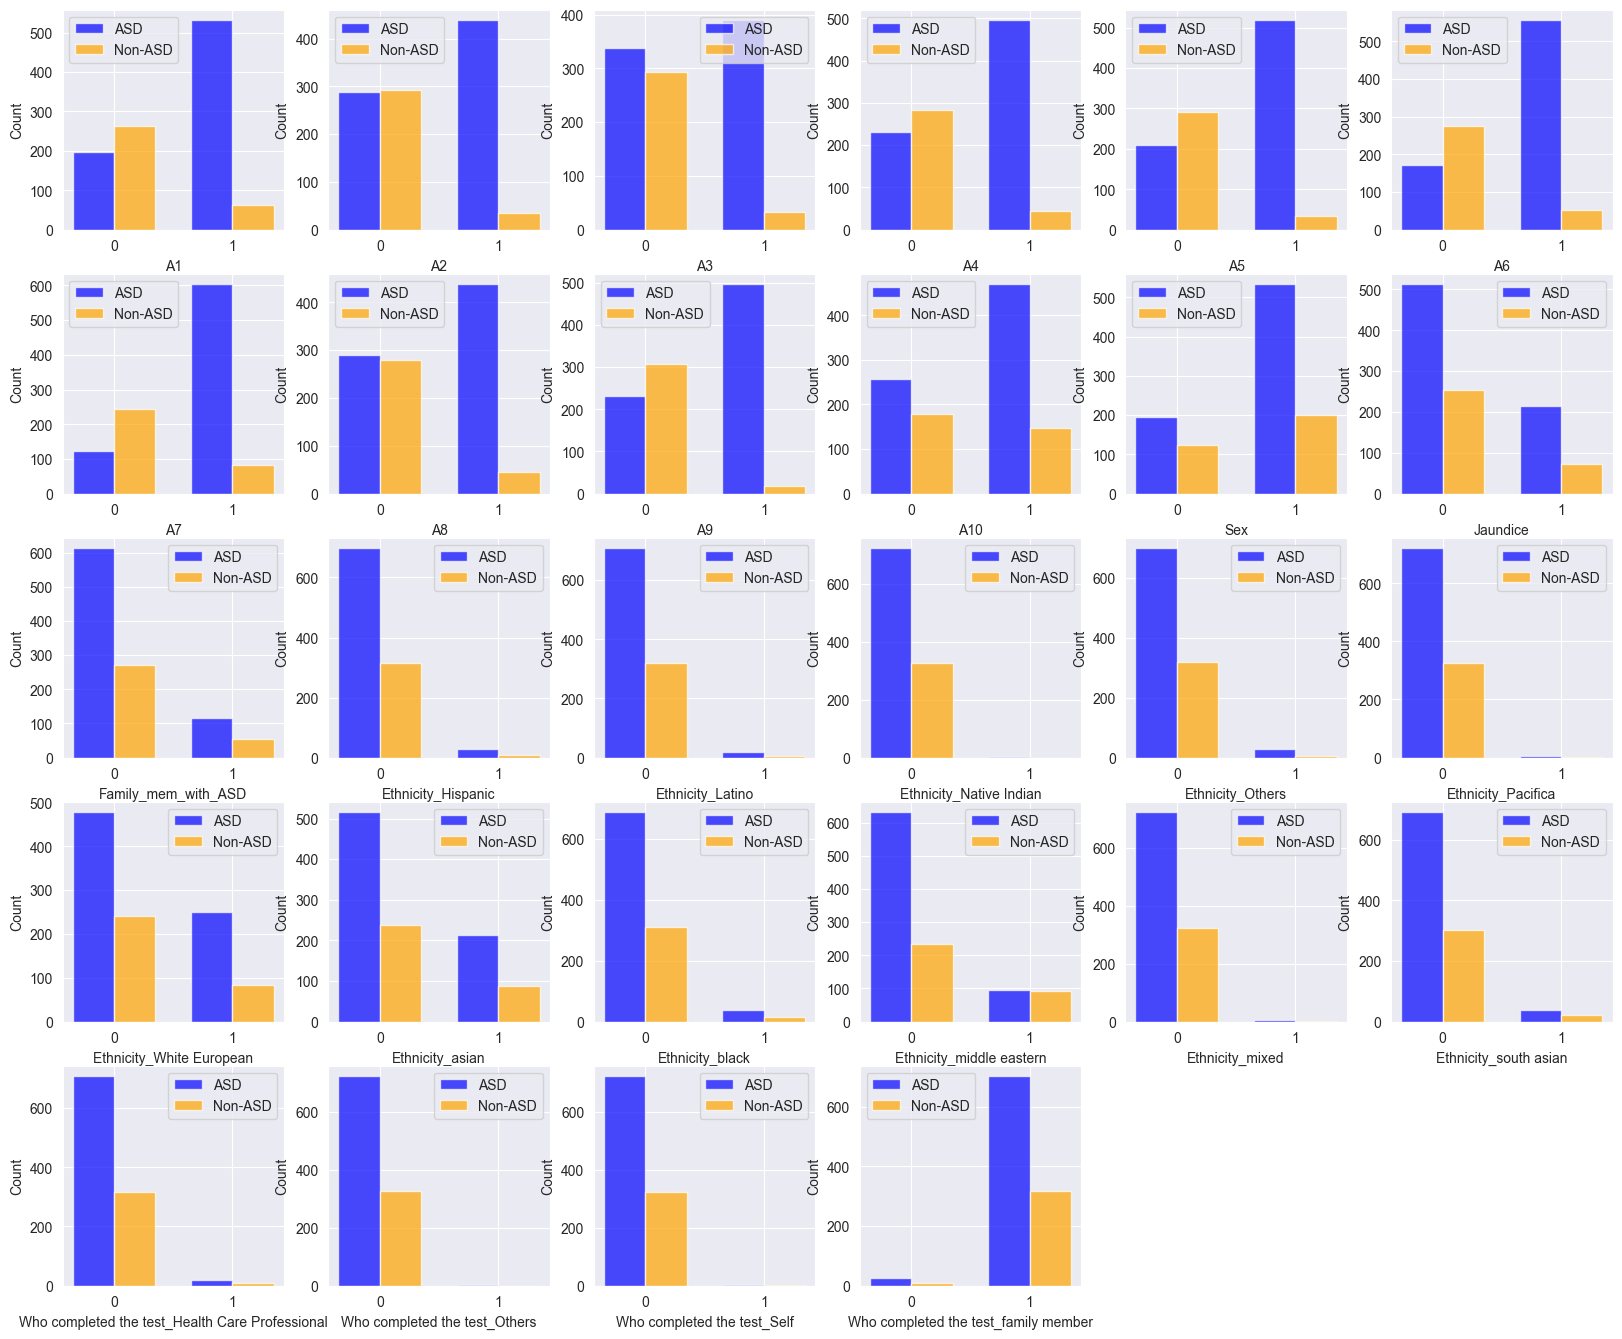

<Figure size 1200x600 with 0 Axes>

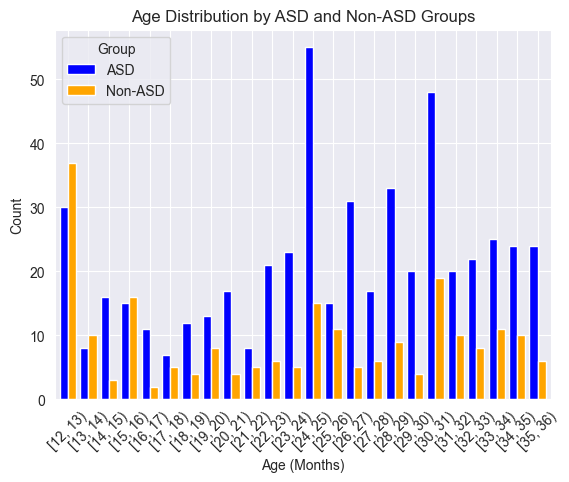

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(20, 20))

# Assuming dataframe_encoded is your dataframe after one-hot encoding

# Splitting the dataframe based on the target variable
df1 = dataframe_encoded[dataframe_encoded['Class/ASD Traits'] == 1].drop(columns=['Class/ASD Traits'])
df2 = dataframe_encoded[dataframe_encoded['Class/ASD Traits'] == 0].drop(columns=['Class/ASD Traits'])
print(dataframe_encoded.columns)

# Plotting the distributions
num_columns = len(df1.columns)
plot_index = 1

for i in range(num_columns):
    column_name = df1.columns[i]
    plt.subplot(6, 6, plot_index)
    
    if column_name == 'Age_Mons':
        continue
    else:
        # Count occurrences of 0s and 1s
        count_0_1_df1 = df1[column_name].value_counts().sort_index()
        count_0_1_df2 = df2[column_name].value_counts().sort_index()
        
        # Create a DataFrame for plotting
        plot_data = pd.DataFrame({
            'Value': [0, 1],
            'ASD': count_0_1_df1,
            'Non-ASD': count_0_1_df2
        }).fillna(0)  # Fill NaNs with 0
        
        # Plot bars
        bar_width = 0.35
        plt.bar(plot_data['Value'] - bar_width/2, plot_data['ASD'], width=bar_width, label='ASD', color='blue', alpha=0.7)
        plt.bar(plot_data['Value'] + bar_width/2, plot_data['Non-ASD'], width=bar_width, label='Non-ASD', color='orange', alpha=0.7)
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.xticks([0, 1])
    
    plt.legend()
    plot_index += 1


# Special plot for continuous variable 'age-months'
df1['Group'] = 'ASD'
df2['Group'] = 'Non-ASD'
df = pd.concat([df1, df2])
        

binwidth = 1
age_min = int(df['Age_Mons'].min())
age_max = int(df['Age_Mons'].max()) + binwidth
bins = range(age_min, age_max, binwidth)
df['Age_Binned'] = pd.cut(df['Age_Mons'], bins, right=False, include_lowest=True)
# Count occurrences within each bin and group
count_df = df.groupby(['Age_Binned', 'Group']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
count_df.plot(kind='bar', width=0.8, color=['blue', 'orange'])
plt.xlabel('Age (Months)')
plt.ylabel('Count')
plt.title('Age Distribution by ASD and Non-ASD Groups')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.show()
df1.drop(columns=['Group'], inplace=True)
df2.drop(columns=['Group'], inplace=True)
plt.tight_layout()
plt.show()

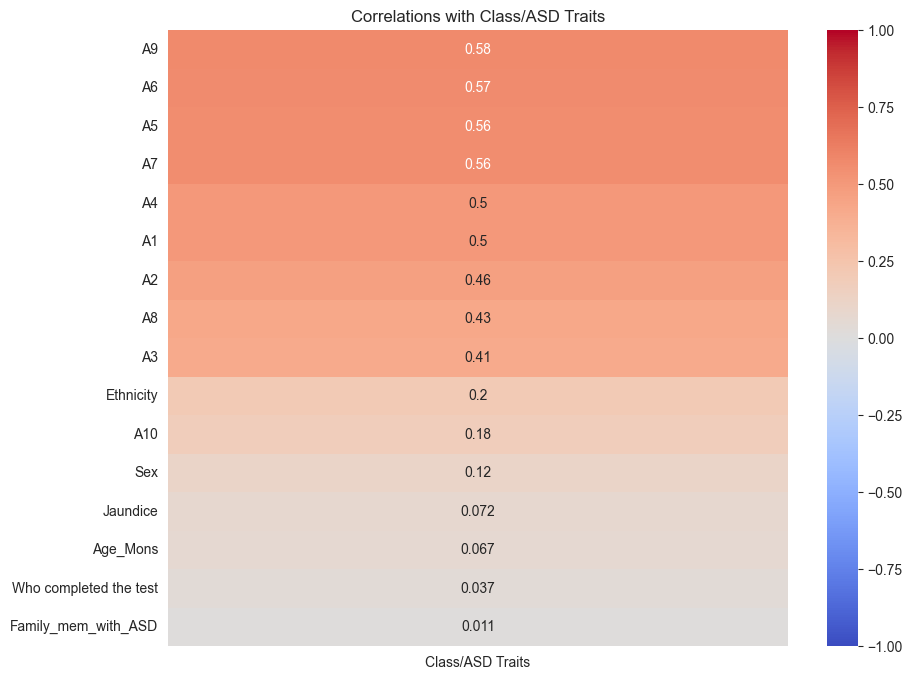

In [8]:
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stat.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

def calculate_correlations(dataframe, target_column):
    correlations = {}
    for column in dataframe.columns:
        if column == target_column:
            continue
        if column=="Age_Mons":
            corr = stat.pointbiserialr(dataframe[target_column], dataframe[column])[0]
        else:
            corr = cramers_v(dataframe[column], dataframe[target_column])    
        correlations[column] = corr
    return correlations
# a_function(int a.bar(), bool b.foo())
# Assuming dataframe_encoded is your dataframe
target_column = 'Class/ASD Traits'

for column in dataframe.columns:
    if dataframe[column].dtype == 'object':
        dataframe[column] = encoder.fit_transform(dataframe[column])

#print(before_one_hot["Ethnicity"])

# Check if the target column is in the dataframe's columns

if target_column in dataframe.columns:
    # Calculate correlations
    correlations = calculate_correlations(dataframe, target_column)
    
    # Convert to DataFrame for heatmap
    correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=[target_column])
    correlation_df = correlation_df.sort_values(by=target_column, ascending=False)
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlations with {target_column}')
    plt.show()
else:
    print(f"Column '{target_column}' not found in the dataframe.")
    

In [16]:
'''
def calculatecorrelations_columns(dataframe,leftColumn, rightColumn):
    if dataframe[leftColumn].nunique() == 2:  # Binary
        if dataframe[rightColumn].nunique() == 2:
            # Both are binary -> Cramér's V
            #print("Cramers_v : " + leftColumn + rightColumn )
            corr = cramers_v(dataframe[leftColumn], dataframe[rightColumn])
        else:
            # Binary - Continuous -> Point Biserial
            #print("Point Biserial Continuous/Binary : " + leftColumn + rightColumn)
            corr, _ = stat.pointbiserialr(dataframe[leftColumn], dataframe[rightColumn])
    elif dataframe[rightColumn].nunique() == 2:
        # Continuous - Binary -> Point Biserial
        #print("Point Biserial Binary(Continuous : " + leftColumn + rightColumn)
        corr, _ = stat.pointbiserialr(dataframe[rightColumn], dataframe[leftColumn])
    else:
        # Continuous - Continuous -> Pearson's
        #print("Pearson's : " + leftColumn + rightColumn)
        corr = dataframe[leftColumn].corr(dataframe[rightColumn]) # Nunca entra aqui, pois o dataset só tem uma coluna continua
    return corr
'''
def calculatecorrelations_notencodedcolumns(dataframe,leftColumn, rightColumn):
    
    if (leftColumn=="Age_Mons" and rightColumn=="Ethnicity") or (leftColumn=="Ethnicity" and rightColumn=="Age_Mons"):
        grouped_data = [dataframe[dataframe["Ethnicity"] == category]["Age_Mons"] for category in dataframe["Ethnicity"].unique()]
        f_stat, p_value = stat.f_oneway(*grouped_data)
        corr = p_value # Mudar o algoritmo talvez
    elif (leftColumn=="Age_Mons" and rightColumn=="Who completed the test") or (leftColumn=="Who completed the test" and rightColumn=="Age_Mons"):
        grouped_data = [dataframe[dataframe["Who completed the test"] == category]["Age_Mons"] for category in dataframe["Who completed the test"].unique()]
        f_stat, p_value = stat.f_oneway(*grouped_data)
        corr = p_value # Mudar o algoritmo talvez
    elif ((leftColumn=="Age_Mons"  and dataframe[rightColumn].nunique() == 2 ) or (rightColumn=="Age_Mons" and dataframe[leftColumn].nunique() == 2 ) ):
         if leftColumn=="Age_Mons":
            corr = stat.pointbiserialr(dataframe[rightColumn], dataframe[leftColumn])[0]
         else:
            corr = stat.pointbiserialr(dataframe[leftColumn], dataframe[rightColumn])[0]    
    else:
        corr = cramers_v(dataframe[leftColumn], dataframe[rightColumn])         
    return corr
higher_correlation = []
correlations_values = []
df_columns = dataframe.columns

for i, col1 in enumerate(df_columns):
    if col1 == 'Class/ASD Traits':
        continue
    for col2 in df_columns[i::]:
        if col1 == col2 or col2 == 'Class/ASD Traits':
            continue
        a_corr= calculatecorrelations_notencodedcolumns(dataframe,col1, col2)
        if a_corr > 0.8:    
            print(f"Correlation between {col1} and {col2}: {a_corr} \n")
        correlations_values.append(a_corr)
#print(sorted(correlations_values))
#print(len(correlations_values))

Correlation between A3 and A4: 0.5451634086572995 

Correlation between Age_Mons and Who completed the test: 0.8694339099608406 

120


# Dataset Training

In [10]:
features = dataframe.drop(['Class/ASD Traits'],axis=1)
labels = dataframe['Class/ASD Traits']

np.unique(labels, return_counts=True)

(array([0, 1]), array([326, 728], dtype=int64))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
smote_enn = SMOTE(random_state=42)
x_train, y_train = smote_enn.fit_resample(x_train, y_train)
print(np.unique(y_train, return_counts=True))


(array([0, 1]), array([587, 587], dtype=int64))


In [12]:
classifiers = []
classifiers.append(["Decision tree classifier",DecisionTreeClassifier()])
classifiers.append(["KNeighbors Classifier",KNeighborsClassifier()])
classifiers.append(["SVM",SVC()])
classifiers.append(["Random Forest",RandomForestClassifier()])
classifiers.append(["Gradient Boosting",GradientBoostingClassifier()])

accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
confusion_matrices = {}
training_times = {}

for name, classifier in classifiers:
    start_time = time.time()
    
    classifier.fit(x_train, y_train)
    
    y_pred = classifier.predict(x_test)
    
    training_times[name] = time.time() - start_time
    
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred)
    recall_scores[name] = recall_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    
for clf_name, clf in classifiers:
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy_scores[clf_name]}")
    print(f"Precision: {precision_scores[clf_name]}")
    print(f"Recall: {recall_scores[clf_name]}")
    print(f"F1 Score: {f1_scores[clf_name]}")
    print(f"Confusion Matrix:\n{confusion_matrices[clf_name]}")
    print(f"Training Time: {training_times[clf_name]} seconds")
    print("----------------------------------------")
    

Classifier: Decision tree classifier
Accuracy: 0.909952606635071
Precision: 0.9420289855072463
Recall: 0.9219858156028369
F1 Score: 0.931899641577061
Confusion Matrix:
[[ 62   8]
 [ 11 130]]
Training Time: 0.004001617431640625 seconds
----------------------------------------
Classifier: KNeighbors Classifier
Accuracy: 0.9052132701421801
Precision: 0.984
Recall: 0.8723404255319149
F1 Score: 0.924812030075188
Confusion Matrix:
[[ 68   2]
 [ 18 123]]
Training Time: 0.009000539779663086 seconds
----------------------------------------
Classifier: SVM
Accuracy: 0.95260663507109
Precision: 0.9924812030075187
Recall: 0.9361702127659575
F1 Score: 0.9635036496350365
Confusion Matrix:
[[ 69   1]
 [  9 132]]
Training Time: 0.02200484275817871 seconds
----------------------------------------
Classifier: Random Forest
Accuracy: 0.9478672985781991
Precision: 0.9710144927536232
Recall: 0.950354609929078
F1 Score: 0.9605734767025089
Confusion Matrix:
[[ 66   4]
 [  7 134]]
Training Time: 0.06401515007